In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image

import datetime

# Read Image Data

In [2]:
from skimage.io import imread, imshow, imsave

100%|█████████████████████████████████████████████| 4/4 [00:18<00:00,  4.54s/it]


(1461, 290, 580, 4)

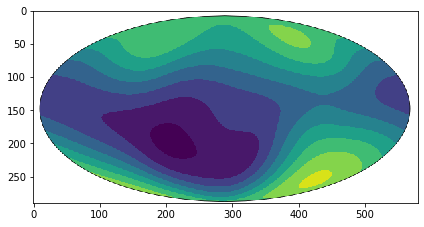

In [5]:
def get_date(year, day_of_year):
    tmp = '{0} {1}'.format(year, day_of_year)
    return datetime.datetime.strptime(tmp, '%Y %j') \
        .strftime("%Y-%m-%d") \
        .replace("-0", "-")

# read images
imgs = []
img_path = "./1518/"

for year in range(2015, 2018+1):
    total_doy = 366 if year == 2016 else 365
    
    for i in tqdm(range(1, total_doy+1)):
        img_name = "{0}.png".format(get_date(year, i))
        
        img = imread(img_path + img_name)
        img = np.array(img, dtype=np.uint8)[210:500, 80:660]
        imgs.append(img)
    
    
imshow(imgs[0])
all_x = np.stack(imgs)
all_x.shape


In [6]:
import torch

/Users/yiyang/miniconda3/envs/cv_proj/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# save as pytorch tensors
all_x = torch.tensor(all_x)
all_x = all_x.permute(0, 3, 1, 2).contiguous()  # from NHWC to NCHW, but permute() breaks contiguous

In [8]:
print(all_x.size())

torch.Size([1461, 4, 290, 580])


In [9]:
torch.save(all_x, 'all_x_1518.pt')

# Read Speed Data

In [10]:
speed_filename = "./ACE_SWEPAM_SPEED_1518.txt"

speed_data = pd.read_csv(speed_filename, sep='\t', lineterminator='\n', header=None)
#speed_data.columns = ['Year', 'Day', 'Speed']
speed_data.shape

FileNotFoundError: [Errno 2] No such file or directory: './ACE_SWEPAM_SPEED_1518.txt'

In [10]:
all_y = np.array(speed_data['Speed'])

In [14]:
all_y

array([435.03, 414.18, 362.47, 371.6 , 351.93, 297.98, 284.1 , 392.73,
       500.96,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
      